In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import numpy as np
import fk
from IPython.display import Video
from IPython.display import HTML
import torchvision.transforms as t
import torch

In [3]:
root = "/media/SSD1/epignatelli/train_dev_set/"
name = "spiral_params5.hdf5"
new_name = "spiral_params5_reduced.hdf5"
path = root + name
new_path = root + new_name

In [36]:
a = h5py.File("/media/SSD1/epignatelli/train_dev_set/spiral_params5.hdf5", "r+")

In [40]:
a.close()

In [4]:
a.keys()

<KeysViewHDF5 ['duration', 'field', 'params', 'period', 'start', 'states', 'stimuli']>

In [5]:
a.create_dataset("states_256", shape=(2000, 3, 256, 256))

<HDF5 dataset "states_256": shape (2000, 3, 256, 256), type "<f4">

In [22]:
def resize(a, size):
    return torch.nn.functional.interpolate(torch.tensor(a).unsqueeze(0), size=size, mode="bilinear").squeeze().numpy()

In [16]:
a["states_256"] = np.empty((2000, 3, 256, 256))

In [24]:
for i in range(len(a["states_256"])):
    a["states_256"][i] = resize(a["states"][i], 256)

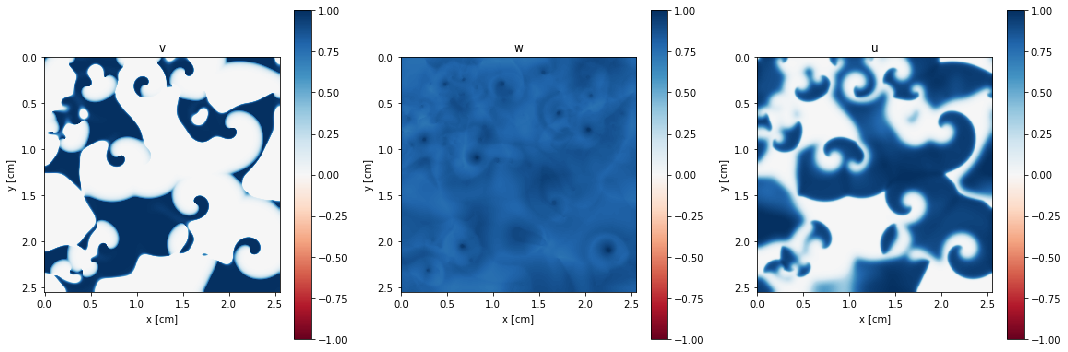

(<Figure size 1080x360 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef5da9150>,
       dtype=object))

In [31]:
fk.plot.show(a["states_256"][1700])

In [8]:
for k, v in a.items():
#     b["duration"] = a["duration"][:]
#     b["field"] = a["field"][:]
    b["params"] = a["params"]
    b["period"] = a["period"]
    b["start"] = a["start"]
    b["state"] = np.array([np.array(t.resize(t.to_pil_image(state), (128, 128))) for state in a["states"]])
    b["stimuli"] = np.array([np.array(t.resize(t.to_pil_image(state), (128, 128))) for state in a["stimuli"]])

KeyError: "Unable to open object (object 'params' doesn't exist)"

In [ ]:
b.keys()

In [ ]:
with h5py.File(path, "r") as file:
    states = file["states"][::interval, 2]
    print(file["states"].shape)
    print(states.shape)